In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_cleaned = pd.read_csv(r"C:\Users\DeLL\Desktop\WOW ML!!!\GadgetValuator VP\Laptop\cleaned_laptop_data_set.csv")

In [3]:
df_cleaned.head()

,Company,Product,TypeName,Screen Size (inches),Resolution,IPS Panel,Retina Display,Full HD,CPU company,CPU series,...,RAM (GB),SSD (GB),Flash Storage (GB),HDD (GB),"SSHD (Hybrid, GB)",GPU company,GPU series,Operating System,Weight,Price (INR)
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,0,0,0,Intel,i5,...,8,128.0,0.0,0.0,0.0,Intel,Iris Plus Graphics 640,Mac OS (New),1.37,122582
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,0,0,0,Intel,i5,...,8,0.0,0.0,0.0,0.0,Intel,HD Graphics 6000,Mac OS (New),1.34,82253
2,HP,250 G6,Notebook,15.6,1920x1080,0,0,0,Intel,i5,...,8,256.0,0.0,0.0,0.0,Intel,HD Graphics 620,Windows 10,1.86,52612
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,0,0,0,Intel,i7,...,16,512.0,0.0,0.0,0.0,AMD,Radeon Pro 455,Mac OS (New),1.83,232177
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,0,0,0,Intel,i5,...,8,256.0,0.0,0.0,0.0,Intel,Iris Plus Graphics 650,Mac OS (New),1.37,165029


### APPLYING FINAL ONE-HOT ENCODING TO CLEANED DATASET TO CONVERT THE REMAINING CATEGORICAL DATA TO NOMINAL DATASET

In [4]:
df_encod = df_cleaned.copy()

object_features = df_encod.select_dtypes(include = "object").columns.tolist()
print(len(object_features))
print(object_features)

10
['Company', 'Product', 'TypeName', 'Resolution', 'CPU company', 'CPU series', 'CPU power Rating', 'GPU company', 'GPU series', 'Operating System']


In [5]:
print("Shape of df before encoding: ", df_encod.shape)

df_encod = pd.get_dummies(df_encod,
               columns=object_features,
               prefix = object_features,
               drop_first = True).astype(int)

print("Shape of df after encoding: ", df_encod.shape)

Shape of df before encoding:  (1302, 22)
Shape of df after encoding:  (1302, 817)


In [6]:
df = df_encod.copy()

## Splitting the dataset into X and Y for training and testing

In [7]:
X = df.drop(columns = "Price (INR)")
y = df['Price (INR)']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Feature Scaling

In [9]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Training Multiple Models - Pre-requisites

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
# Function to get metrics
def get_metrics(y_test, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE': {round(MSE, 3)}, 'RMSE': {round(RMSE, 3)}, 'MAE': {round(MAE, 3)}, 'R2': {round(R2, 3)}]")

## Training Multiple Models

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Scores after models are trained

In [13]:
# Training Ridge and Lasso Regression
rir = Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)


C:\Users\DeLL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.792e+10, tolerance: 4.223e+08
  model = cd_fast.enet_coordinate_descent(


In [14]:
# Get metrics for each model

get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")

Ridge : ['MSE': 636150514.162, 'RMSE': 25222.024, 'MAE': 16995.417, 'R2': 0.849]
Lasso : ['MSE': 777201979.361, 'RMSE': 27878.342, 'MAE': 17942.561, 'R2': 0.816]


In [15]:
# # Polynomial Regression
# poly = PolynomialFeatures(2)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# poly_r = LinearRegression().fit(X_train_poly, y_train)
# y_pred_poly = poly_r.predict(X_test_poly)

In [16]:
# get_metrics(y_test, y_pred_poly, "PolynomialFeatures")

In [17]:
# Support Vector Regression
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [18]:
get_metrics(y_test, y_pred_svr, "SVR")

SVR : ['MSE': 4322892957.377, 'RMSE': 65748.711, 'MAE': 46662.52, 'R2': -0.026]


In [19]:
# KNeighbors Regressor
knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

In [20]:
get_metrics(y_test, y_pred_knnr, "KNeighborsRegressor")

KNeighborsRegressor : ['MSE': 1285968650.213, 'RMSE': 35860.405, 'MAE': 24146.9, 'R2': 0.695]


In [21]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

In [22]:
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")

DecisionTreeRegressor : ['MSE': 1084170053.176, 'RMSE': 32926.738, 'MAE': 19701.705, 'R2': 0.743]


In [23]:
# Random Forest Regressor
rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [24]:
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")

RandomForestRegressor : ['MSE': 803131512.588, 'RMSE': 28339.575, 'MAE': 17906.9, 'R2': 0.809]


In [25]:
# XGBoost Regressor
xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [26]:
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

XGBRegressor : ['MSE': 576392889.894, 'RMSE': 24008.184, 'MAE': 15983.044, 'R2': 0.863]


In [27]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
get_metrics(y_test, y_pred_gbr, "GradientBoostingRegressor")

GradientBoostingRegressor : ['MSE': 694505622.055, 'RMSE': 26353.475, 'MAE': 19097.127, 'R2': 0.835]


In [28]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor().fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)
get_metrics(y_test, y_pred_abr, "AdaBoostRegressor")

AdaBoostRegressor : ['MSE': 1653581087.872, 'RMSE': 40664.248, 'MAE': 34293.661, 'R2': 0.608]


In [29]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor().fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
get_metrics(y_test, y_pred_etr, "ExtraTreesRegressor")

ExtraTreesRegressor : ['MSE': 681231390.59, 'RMSE': 26100.41, 'MAE': 16990.256, 'R2': 0.838]


In [30]:
# LightGBM Regressor
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor().fit(X_train, y_train)
y_pred_lgbmr = lgbmr.predict(X_test)
get_metrics(y_test, y_pred_lgbmr, "LGBMRegressor")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 1041, number of used features: 59
[LightGBM] [Info] Start training from score 103417.184438
LGBMRegressor : ['MSE': 826737126.005, 'RMSE': 28753.037, 'MAE': 17603.647, 'R2': 0.804]


In [31]:
# CatBoost Regressor
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(verbose=0).fit(X_train, y_train)
y_pred_cbr = cbr.predict(X_test)
get_metrics(y_test, y_pred_cbr, "CatBoostRegressor")

CatBoostRegressor : ['MSE': 544935955.665, 'RMSE': 23343.863, 'MAE': 15794.404, 'R2': 0.871]


In [32]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
en = ElasticNet().fit(X_train, y_train)
y_pred_en = en.predict(X_test)
get_metrics(y_test, y_pred_en, "ElasticNet")

ElasticNet : ['MSE': 548307423.284, 'RMSE': 23415.965, 'MAE': 15744.735, 'R2': 0.87]


In [33]:
# Huber Regressor
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor().fit(X_train, y_train)
y_pred_hr = hr.predict(X_test)
get_metrics(y_test, y_pred_hr, "HuberRegressor")

HuberRegressor : ['MSE': 674615485.174, 'RMSE': 25973.361, 'MAE': 16651.162, 'R2': 0.84]


C:\Users\DeLL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Best Model for this case: CatBoostRegressor with 'R2': 0.871

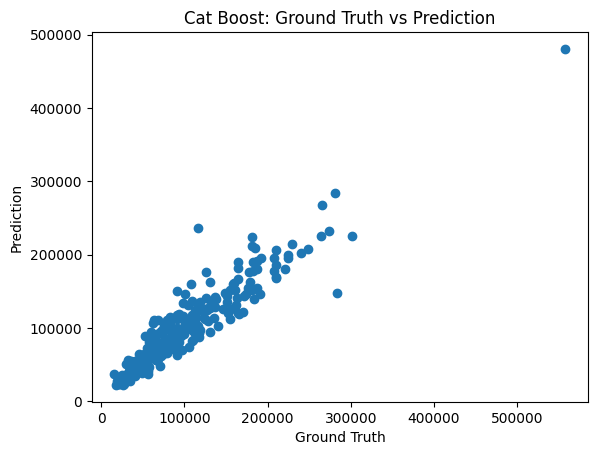

In [37]:
plt.scatter(y_test, y_pred_cbr)
plt.title("Cat Boost: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

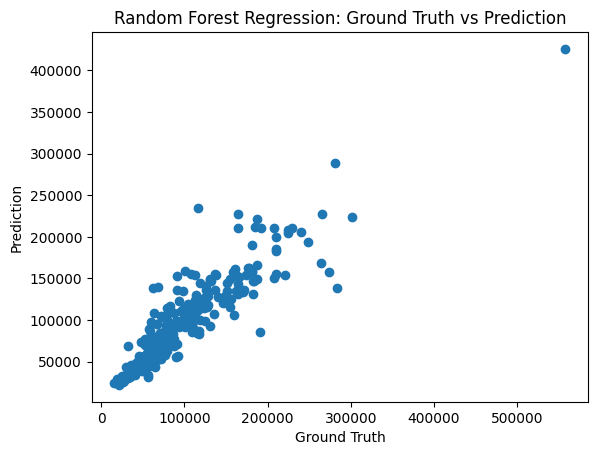

In [35]:
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest Regression: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

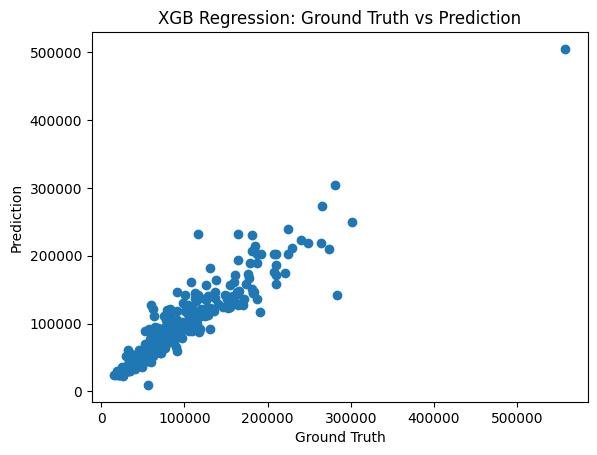

In [36]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGB Regression: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()